# Random Forest Regression (Boston Data)

Decision Tree는 Overfitting 가능성이 높다는 약점이 있다. Random Forest는 여러개의 Decision Tree를 형성하고 동일한 데이터로부터 복원 추출하여 Decision Tree에 통과 시킨다. 그 후, 각 Tree가 분류한 결과를 취합하는 앙상블(Ensenble) 방식의 모델이다. 이렇게 많은 수의 Tree를 생성함으로써 일부 Tree에 Overfitting이 발생하더라도 Overfitting이 결과에 영향을 주는 것을 방지한다.

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn import ensemble
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, roc_curve

%matplotlib inline

----

**TIP)**   
*Ensemble*   

<img src='./image/bagging_boosting.jpg' width=500 height=400>

- Bagging (Bootstrap Aggregation)    
Bootstraping(복원 추출하여 train set을 만드는 것, 비복원 추출은 Pasting이라 함) 된 샘플을을 모델에 학습시킨다. 그 후, 학습된 모델의 결과를 집계하여 투표(Voting) 방식으로 최종 결과 값을 도출하며 연속적인 데이터에 대해서는 평균으로 집계한다. 이러한 Bagging은 Overfitting을 피하고 분산(Variance)을 낮추는 효과를 가진다. 대표적으로, Random Forest 모델이 있다.    

- Boosting    
Boosting은 성능 자체의 강화와 어려운 문제의 해결에 초점을 맞추고 있으며 편향(bias)가 높은 경우 이를 해결하는 효과가 있다. Bagging 처럼 복원 샘플링 방식을 사용하지만 순차적으로 학습이 진행되며 결과에 따라 오답에 대해 높은 가중치 정답에 대해 낮은 가중치를 부여해 가며 오답에 집중하는 방식으로 학습이 이루어진다. 높은 정확도를 가지지만 Outlier에는 취약것이 단점이다. 대표적으로 AdaBoost, XGBoost, GradientBoost 등이 있다.     

<img src='./image/stacking_cv.png' width=600 height=400>

- Stacking    
Stacking은 서로 상이한 개별의 모델들이 예측한 데이터를 다시 meta data set으로 사용해서 학습한다. 즉, 개별 모델들(Base Learner)과 최종모델(Meta Learner)이 별도로 존재한다. 원본 데이터를 Base와 Meta가 함께 사용하므로 Overfitting에 취약한 경우가 많은데, 이를 해결하기 위해 Cross Validation 방식을 사용하는 경우가 많다.

----

## 1. Load Datasets

In [2]:
boston_data = pd.read_csv('./data/Boston.csv')
boston_data.head(3)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [3]:
boston_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


## 2. PreProcessing

In [4]:
# X, y갑 분할
X = boston_data[boston_data.columns.difference(['medv'])]
y = boston_data['medv']
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [5]:
# 학습, 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## 3. Random Forest

In [6]:
# Random Forest 생성
# n_estimators는 tree의 수를 지정하며 default는 100 (ver0.22 이하에서는 default 10)
# max_feature의 값이 클 경우, Tree들이 매우 비슷해자며 가장 두드러진 특성에 맞춰 예측하는 효과가 있음
# max_feature의 값이 작을 경우, Tree들이 매우 달라지며 Overfiting이 줄어드는 효과가 있음
rf_regr = ensemble.RandomForestRegressor(n_estimators=500,    # 500개의 tree
                                         max_features=6,      # 무작위로 선택할 Feature의 최대 개수
                                         random_state=123)

# Random Forest 학습
rf_regr.fit(X_train, y_train)

y_pred = rf_regr.predict(X_test)
print('MSE: ', metrics.mean_squared_error(y_pred, y_test))

MSE:  6.638956752549043


In [7]:
# parameter들을 defalut 값으로 설정
rf_regr = ensemble.RandomForestRegressor(random_state=123)

# Random Forest 학습
rf_regr.fit(X_train, y_train)

y_pred = rf_regr.predict(X_test)
print('MSE: ', metrics.mean_squared_error(y_pred, y_test))

MSE:  7.413463666666667


feature: 7 ( 6.473 )


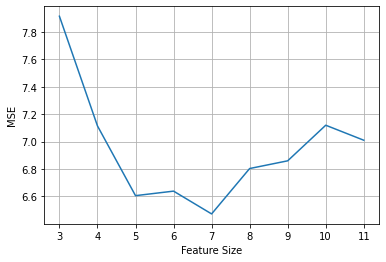

In [8]:
# max_feature에 따라 모델 성능 비교
feature_size = range(3, 12)
mse_scores = []
for size in feature_size:
    # n_jobs는 병렬 작업 수를 의미, -1일 경우 모든 프로세서 사용
    rf_regr = ensemble.RandomForestRegressor(n_estimators=500, 
                                             max_features=size, 
                                             random_state=123,
                                             n_jobs=-1)
    rf_regr.fit(X_train, y_train)
    y_pred = rf_regr.predict(X_test)
    mse = metrics.mean_squared_error(y_pred, y_test)
    mse_scores.append(mse)
    
opt_feature = mse_scores.index(min(mse_scores)) + 3
print('feature:', opt_feature, '(', round(min(mse_scores), 3), ')')
plt.plot(feature_size, mse_scores)
plt.xlabel('Feature Size')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

In [11]:
# 중요한 상위 10개의 Feature 확인
rf_regr = ensemble.RandomForestRegressor(n_estimators=500, max_features=7, random_state=123)
rf_regr.fit(X_train, y_train)
feature_importance = pd.DataFrame({'feature': X_train.columns, 'importance': rf_regr.feature_importances_})
feature_importance.sort_values(by='importance', ascending=False)[:10]

,feature,importance
6,lstat,0.354809
10,rm,0.325812
4,dis,0.066492
7,nox,0.061432
3,crim,0.049343
5,indus,0.041486
8,ptratio,0.032656
0,age,0.025632
11,tax,0.018753
1,black,0.014333


# Random Forest Classfication (Heart Data)

## 1. Load Datasets

In [14]:
heart_data = pd.read_csv('./data/Heart.csv', index_col=0)
heart_data.head(3)

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [15]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 1 to 303
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        303 non-null    int64  
 1   Sex        303 non-null    int64  
 2   ChestPain  303 non-null    object 
 3   RestBP     303 non-null    int64  
 4   Chol       303 non-null    int64  
 5   Fbs        303 non-null    int64  
 6   RestECG    303 non-null    int64  
 7   MaxHR      303 non-null    int64  
 8   ExAng      303 non-null    int64  
 9   Oldpeak    303 non-null    float64
 10  Slope      303 non-null    int64  
 11  Ca         299 non-null    float64
 12  Thal       301 non-null    object 
 13  AHD        303 non-null    object 
dtypes: float64(2), int64(9), object(3)
memory usage: 35.5+ KB


## 2. PreProcessing

In [35]:
# Null값 제거
heart_data = heart_data.dropna()
heart_data.shape

(297, 14)

In [36]:
# X, y 분할
X = heart_data[heart_data.columns.difference(['AHD'])]
y = heart_data['AHD']
print(X.shape)
print(y.shape)

(297, 13)
(297,)


In [37]:
# 더미화
X = pd.get_dummies(X)
X.head(3)

,Age,Ca,Chol,ExAng,Fbs,MaxHR,Oldpeak,RestBP,RestECG,Sex,Slope,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable
1,63,0.0,233,0,1,150,2.3,145,2,1,3,0,0,0,1,1,0,0
2,67,3.0,286,1,0,108,1.5,160,2,1,2,1,0,0,0,0,1,0
3,67,2.0,229,1,0,129,2.6,120,2,1,2,1,0,0,0,0,0,1


In [38]:
# 정수 인코딩
y = y.apply(lambda x: 1 if x=='Yes' else 0)
y

1      0
2      1
3      1
4      0
5      0
      ..
298    1
299    1
300    1
301    1
302    1
Name: AHD, Length: 297, dtype: int64

## 3. Random Forest

이번에는, Decision Tree와 Random Forest의 차이를 비교해 본다.

In [43]:
# Decision Tree Cross Validation 평가
tree_clf = tree.DecisionTreeClassifier(random_state=123)
acc_score_t = cross_val_score(tree_clf, X, y, cv=7, scoring='accuracy')

# Random Forest Cross Validation 평가
rf_clf = ensemble.RandomForestClassifier(random_state=123)
acc_score_r = cross_val_score(rf_clf, X, y, cv=7, scoring='accuracy')

print('Decision Tree: ', round(np.mean(acc_score_t), 3))
print('Random Forest: ', round(np.mean(acc_score_r), 3))

Decision Tree:  0.7
Random Forest:  0.811


----

**TIP)**    
*ROC(Receiver Operating Characteristic)곡선*

ROC곡선은 Binary Classifier System에 대한 성능 평가 기법이며, ROC 커브가 좌상단에 붙어 있는 커브일수록 더 좋은 모델이라고 할 수 있다. ROC 곡선의 아랫 면적은 AUC(Area Under the Curve)라고 하며 AUC는 '임의의 Curve에 대해 그 아래의 면적을 계산한 값'을 뜻한다. 

<img src='./image/roc.png' width=250 height=250>

$TPR(Sensitivity) = \frac{\sum{True Positive}}{\sum{(True Positive + False Negative)}} = $ 1인 케이스에 대해 1로 잘 예측한 비율
$FPR(1-Specificity) = \frac{\sum{False Positive}}{\sum{(True Positive + False Positive)}} = $ 0인 케이스에 대해 1로 잘못 예측한 비율   

-----

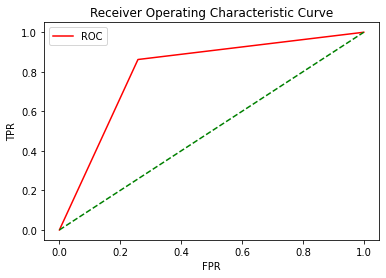

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

def print_roc(fpr, tpr):
    plt.plot(fpr, tpr, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()


tree_clf = tree.DecisionTreeClassifier(random_state=123)
tree_clf.fit(X_train, y_train)


# ROC 곡선
y_pred = tree_clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print_roc(fpr, tpr)

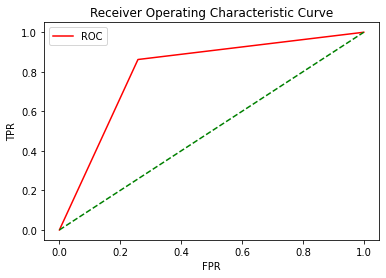

In [64]:
rf_clf = ensemble.RandomForestClassifier(random_state=123)
rf_clf.fit(X_train, y_train)

# ROC 곡선
y_pred = tree_clf.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print_roc(fpr, tpr)

In [56]:
y_pred = tree_clf.predict_proba(X_test)
y_pred = y_pred[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.25806452 1.        ]
[0.         0.86206897 1.        ]
[2. 1. 0.]


<br/>

**결론)**   

정확도 0.7을 가지는 Decision Tree보다 Random Forest가 0.811 로 높은 정확도를 가진다.

<br/>